# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. 
____

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we used pandas to directly read data from Yahoo using pandas!

Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) 

### The Imports


In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We got the data using pandas datareader for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Here, we set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This involved a few steps:**
1. Using datetime to set start and end datetime objects.
2. Figuring out the ticker symbol for each bank.
2. Figuring out how to use datareader to grab info on the stock.

** Used [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions.**
    

In [3]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,1,1)
BAC=data.DataReader("BAC",'yahoo',start,end)
JPM=data.DataReader("JPM",'yahoo',start,end)
GS=data.DataReader("GS",'yahoo',start,end)
MS=data.DataReader("MS",'yahoo',start,end)
C=data.DataReader("C",'yahoo',start,end)
WFC=data.DataReader("WFC",'yahoo',start,end)

In [4]:
tickers=['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [5]:
bank_stocks=pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.425114   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.059509   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.103382   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.052204   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.074108   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  36.631054  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  36.656166  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  36.756695  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  36.794384  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  37.183868  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.613142  
2006-01-04  31.530001  10870000.0  20.374050  
2006-01-05  31.495001  10158000.0  20.351437  
2006-01-06  31.680000   8403800.0  20.470978  
2006-01-09  31.674999   5619600.0  20.467749  

[5 rows x 36 columns]

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.425114  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.059509  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.103382  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.052204  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.074108  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.631054  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.656166  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.756695  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.794384  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.183868  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.613142  
2006-01-04   31.799999  31.530001  10870000.0  20.374050  
2006-01-05   31.500000  31.495001  10158000.0  20.351437  
2006-01-06   31.580000  31.680000   8403800.0  20.470978  
2006-01-09   31.674999  31.674999   5619600.0  20.467749  

[5 rows x 36 columns]

# EDA

Refereneces: Documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).


**Max Close price for each bank's stock throughout the time period.**

In [8]:
bank_stocks.xs('Close',level=1,axis=1).max(axis=0)

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**Created a new empty DataFrame called returns. This dataframe contains the returns for each bank's stock. Returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns=pd.DataFrame()

In [10]:
for tick in tickers:
    returns[tick+ ' returns']=bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC returns,C returns,GS returns,JPM returns,MS returns,WFC returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Pairplot using seaborn of the returns dataframe.**

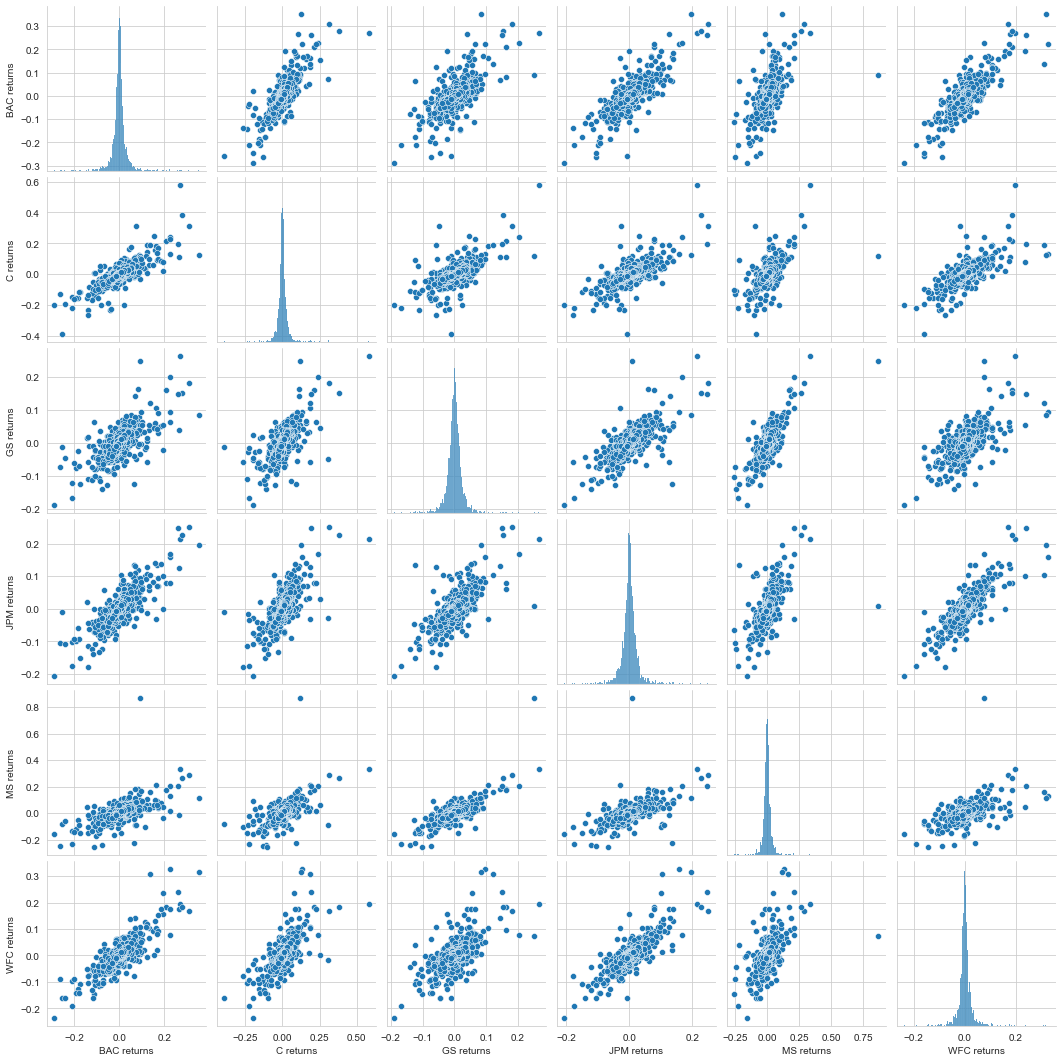

In [11]:
import seaborn as sns
sns.set_style('whitegrid')
sns.pairplot(returns[1:])

**Dates on which each bank stock had the best and worst single day returns. 4 of the banks share the same day for the worst drop**

In [12]:
returns.idxmin()

BAC returns   2009-01-20
C returns     2009-02-27
GS returns    2009-01-20
JPM returns   2009-01-20
MS returns    2008-10-09
WFC returns   2009-01-20
dtype: datetime64[ns]

In [13]:
returns.idxmax()

BAC returns   2009-04-09
C returns     2008-11-24
GS returns    2008-11-24
JPM returns   2009-01-21
MS returns    2008-10-13
WFC returns   2008-07-16
dtype: datetime64[ns]

**the riskiest stock over the entire time period and riskiest for the year 2015?**

In [14]:
returns.std()

BAC returns    0.036647
C returns      0.038672
GS returns     0.025390
JPM returns    0.027667
MS returns     0.037819
WFC returns    0.030238
dtype: float64

In [15]:
#returns.reset_index()[returns.reset_index()['Date'].apply(lambda x:x.year)==2015].std()[1:]
returns.loc[datetime.datetime(2015,1,1):datetime.datetime(2015,12,31)].std() 

BAC returns    0.016163
C returns      0.015289
GS returns     0.014046
JPM returns    0.014017
MS returns     0.016249
WFC returns    0.012591
dtype: float64

**distplot using seaborn of the 2015 returns for Morgan Stanley**

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS returns', ylabel='Density'>

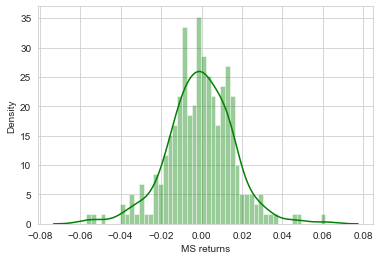

In [16]:
import seaborn as sns
sns.distplot(returns['MS returns'].loc[datetime.datetime(2015,1,1):datetime.datetime(2015,12,31)], bins=50, color='green')

**distplot using seaborn of the 2008 returns for CitiGroup**

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C returns', ylabel='Density'>

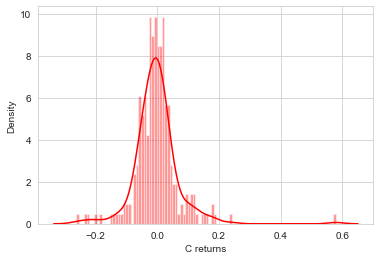

In [17]:
sns.distplot(returns['C returns'].loc[datetime.datetime(2008,1,1):datetime.datetime(2008,12,31)], bins=100, color='red')

____
# More Visualization

Tools: MatplotLib, Seaborn, Pyplot, Cufflinks.

### Imports

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


import plotly
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()

**line plot showing Close price for each bank for the entire index of time.**

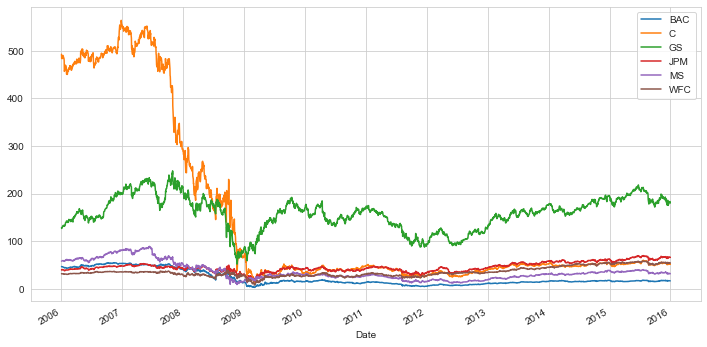

In [19]:
data=bank_stocks.xs('Close', level=1, axis=1)
for tick in tickers:
    data[tick].plot(figsize=(12,6),label=tick)
plt.legend(loc=0)

<AxesSubplot:xlabel='Date'>

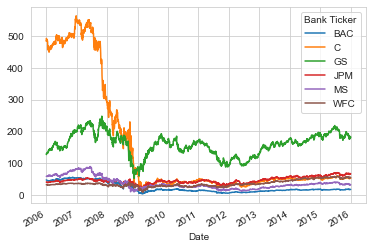

In [20]:
data.plot()

In [21]:
data.iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Ploting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

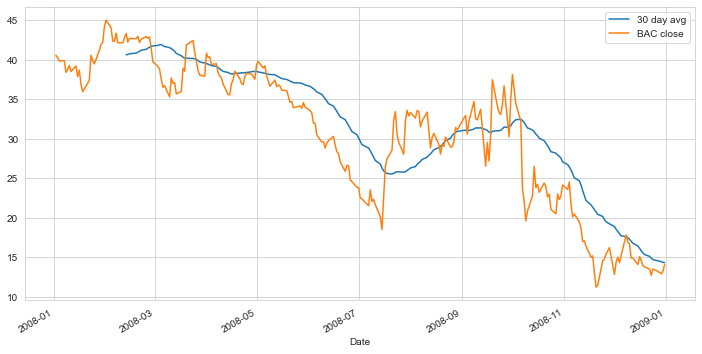

In [29]:
plt.figure(figsize=(12,6))
data['BAC'].loc[datetime.datetime(2008,1,1):datetime.datetime(2008,12,31)].rolling(window=30).mean().plot(label='30 day avg')
data['BAC'].loc[datetime.datetime(2008,1,1):datetime.datetime(2008,12,31)].plot(label='BAC close')
plt.legend()

**heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

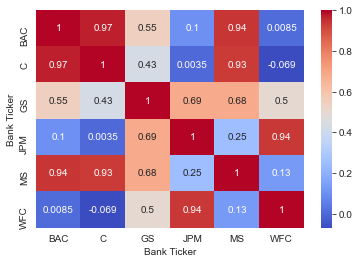

In [32]:
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

**seaborn's clustermap to cluster the correlations together:**

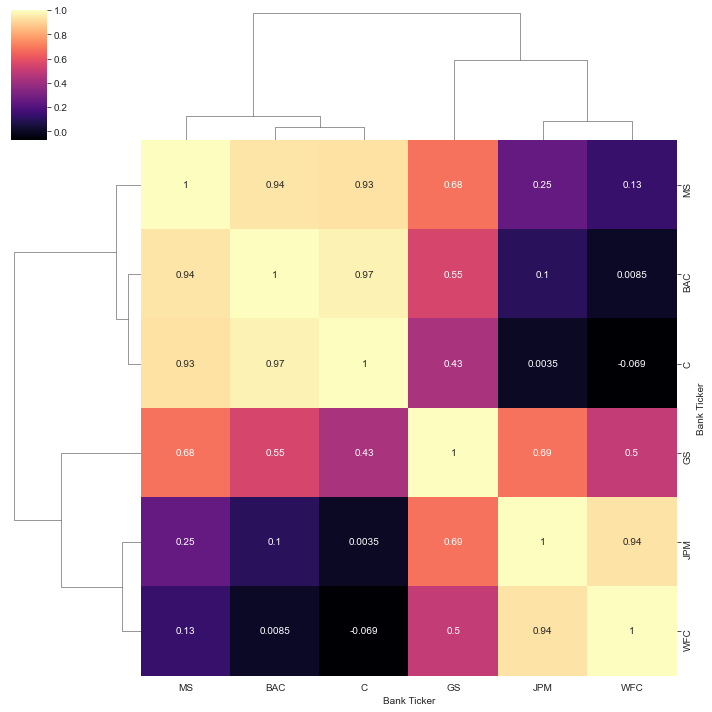

In [35]:
sns.clustermap(data.corr(),annot=True, cmap='magma')

In [36]:
data.corr().iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Technical Analysis)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. 

**candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [37]:
BAC[['Open', 'High', 'Low', 'Close']].loc[datetime.datetime(2015,1,1):datetime.datetime(2016,1,1)].iplot(kind='candle')

**Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [40]:
MS['Close'].loc[datetime.datetime(2015,1,1):datetime.datetime(2016,1,1)].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Bollinger Band Plot for Bank of America for the year 2015.**

In [41]:
BAC['Close'].loc[datetime.datetime(2015,1,1):datetime.datetime(2016,1,1)].ta_plot(study='boll')

# Thank You!

